In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
cars = sns.load_dataset('mpg')

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
cars.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [6]:
cars.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [7]:
cars.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [8]:
cars = cars[cars.cylinders.isin([8, 6, 4])]

In [9]:
hp = cars.horsepower
mpg = cars.mpg
cyl = cars.cylinders
org = cars.origin

# cars.model_year.describe()
cars['newer'] = cars.model_year>75
newer = cars.newer

In [10]:
color = sns.color_palette('Paired')
color

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [11]:
# sns.set_style('darkgrid')
sns.set_style('whitegrid')



# sns.set_style('white')
# plt.rc('xtick', labelsize=14)
# plt.rc('ytick', labelsize=14)
# plt.rc('date.autoformatter', day='%b %Y')

## Distplot

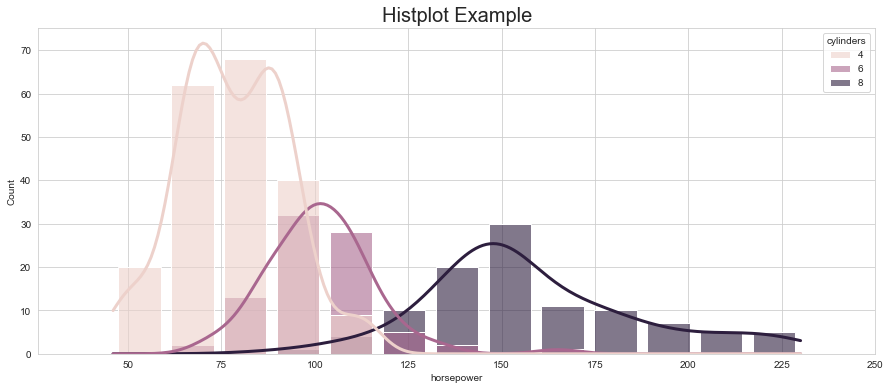

In [12]:
plt.figure(figsize=(15,6))

# sns.displot(kind="hist") == sns.histplot

p = sns.histplot(x=hp,
             
             # y=mpg,
             # cbar=True, cbar_kws=dict(shrink=.9),  # show values correlated with colors
             
             hue=cyl,
             legend=True,  # hue legend
             
             # stat='density','count', 'percent', # y axis
             # log_scale=True,
             
             # element='poly','step', 'bars'
             # fill=False 
             # discrete=True, #  (True, True) for x and y,  # for discrete integer data
             # multiple='stack', 'dodge', 'layer', 'fll',  # what to do with multiple values in the same bin

             alpha=0.6,
             shrink=.8,
             
             # bins=10, 
             # binwidth=10,
            
             kde=True, line_kws=dict(linewidth=3), kde_kws=dict(bw_adjust= 1),
             
             # cumulative=True,  # cumulate values as bins increase
             
            )

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":20,"axes.labelsize":16})   
plt.xlim(hp.min()-20, hp.max()+20)
p.set_title("Histplot Example")
plt.yticklabels=[]
# plt.tight_layout()

## Kde plot

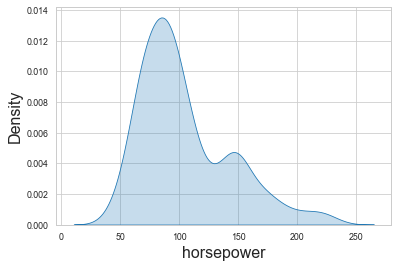

In [13]:
sns.kdeplot(x=hp,
            shade=True,
            bw_adjust=1,  # increasing variance, bigger value = smoother curves
            #cumulative=True,  # use cumulative function
           )

plt.xlim(hp.min()-50, hp.max()+50)
plt.yticklabels=[]

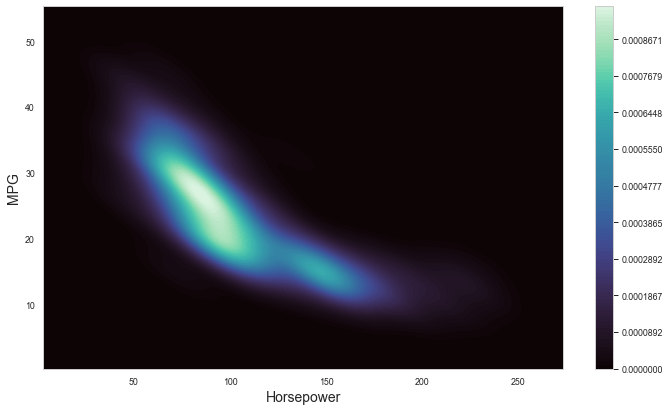

In [14]:
plt.figure(figsize=(10,6))

# combine two plots to see samples
# sns.scatterplot(x=hp, y=mpg, color='white', alpha=1, s=10, zorder=2)

sns.kdeplot(x=hp, y=mpg,
            
            levels=100,  # no lines
            
            fill=True,  # fill space between lines
            thresh=0.00, #0.05  # treshold for filling the space 0.00 fills all space
            
            cbar=True,
            cmap='mako'
           )

plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('MPG', fontsize=14)
plt.tight_layout()

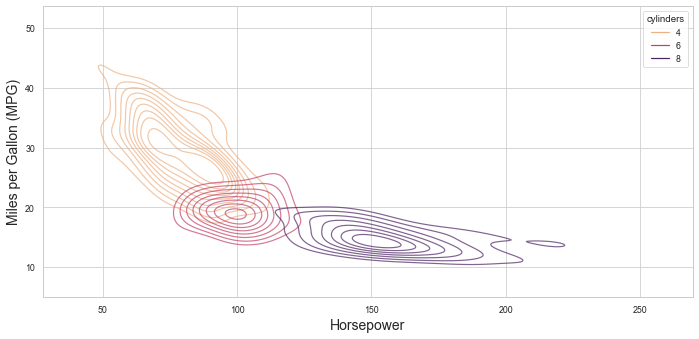

In [15]:
plt.figure(figsize=(10,5))

sns.kdeplot(x=hp, y=mpg, 
            hue=cyl,
            # fill=True,
            thresh=0.2, 
            alpha=0.7,
            # cbar=True,
            palette='flare',
           )

plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Miles per Gallon (MPG)', fontsize=14)
plt.tight_layout()

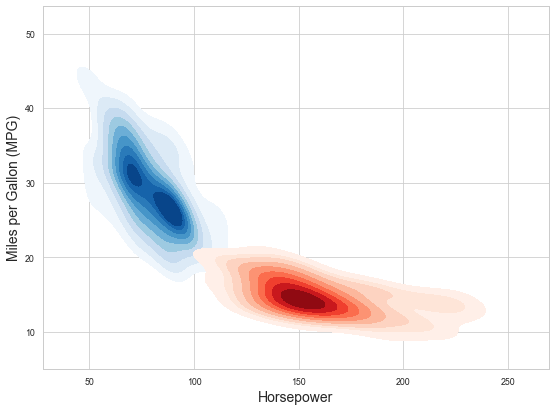

In [16]:
cyl_4 = cars[cars.cylinders==4]
cyl_8 = cars[cars.cylinders==8]

plt.figure(figsize=(8,6))

sns.kdeplot(x=cyl_4.horsepower, y=cyl_4.mpg,
            cmap='Blues', shade=True, thresh=0.1)
sns.kdeplot(x=cyl_8.horsepower, y=cyl_8.mpg,
            cmap='Reds', shade=True, thresh=0.1)

plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Miles per Gallon (MPG)', fontsize=14)
plt.tight_layout()

## Boxplot

In [17]:
cars.mpg.describe()

count    391.000000
mean      23.515345
std        7.847549
min        9.000000
25%       17.000000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

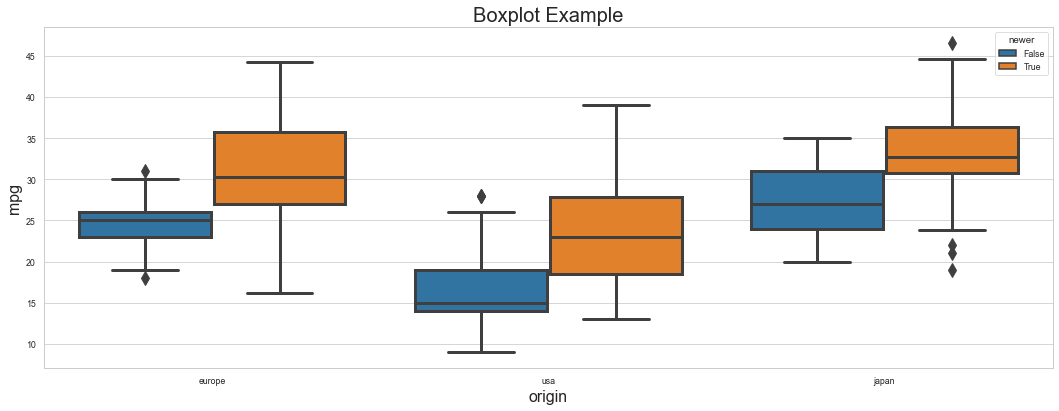

In [18]:
plt.figure(figsize=(15,6))
# sns.swarmplot(x=org, y=mpg, color=".25", order=['europe', 'usa', 'japan'])

p = sns.boxplot(
                x=org, y=mpg, 
                # x=mpg,
                hue=newer, # cyl,
                # dodge=False,  # when using hue, shift boxes so they are not on top of each other

                order=['europe', 'usa', 'japan'], 
                # hue_order=['False', 'True']  # list of string
    
                # width=0.5,  # box size
                linewidth=3,  # box line width
                # whis=1,  # interquartile range multiplier
    
                fliersize=10,  # outlier mark size
                # palette=,
               )



sns.set_context("paper", rc={"font.size":16,"axes.titlesize":20,"axes.labelsize":16})   
p.set_title("Boxplot Example")
plt.tight_layout()

## Violin plot

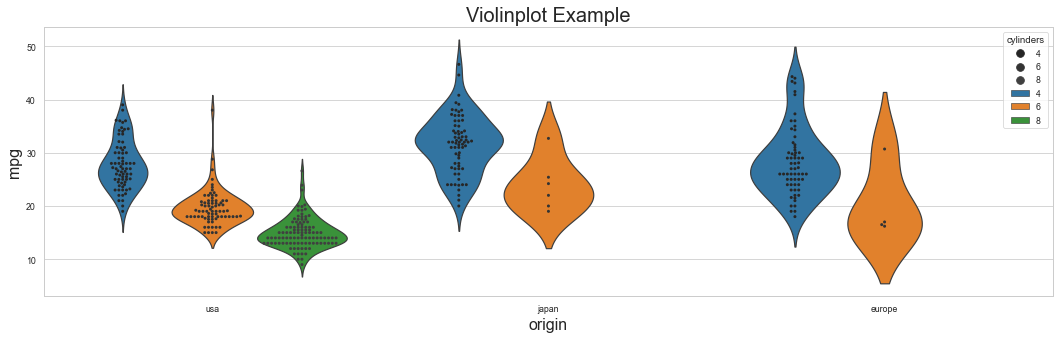

In [19]:
plt.figure(figsize=(15,5))
sns.swarmplot(x=org, y=mpg, color=".25", size=3, hue=cyl, dodge=True)

p = sns.violinplot(x=org, y=mpg,
                   hue=cyl,
               
                   # bw=0.5,  # variance
                   inner=None#'stick' #'quartiles', 'box', 'point', 'stick'  # show inside figure

                   # scale='width', # 'count', 'area',
                   # linewidth=2,
                   # scale_hue=False,

                   # split=True,  # split requires exactly 2 hue values
                   # x='origin', y='mpg', hue='cylinders',
                   # data=cars[cars.cylinders.isin([4, 6])],
                  )

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":20,"axes.labelsize":16})   
p.set_title("Violinplot Example")
plt.tight_layout()

## Swarmplot & Stripplot

Swarmplot ans stripplot are very similar. In swarmplot, dots that are in the same place, are equally aligned with each other. In stripplot, a random noise is added to them.

All markers: https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers

C:\Anaconda\envs\eda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda\envs\eda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda\envs\eda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda\envs\eda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


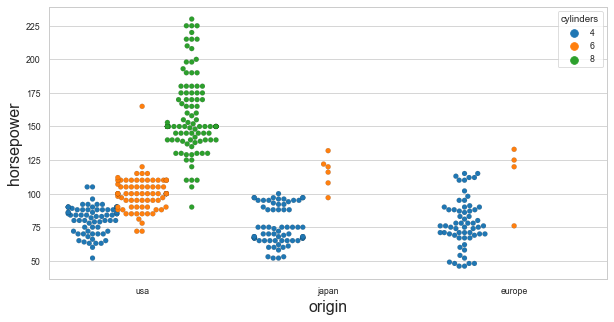

In [20]:
plt.figure(figsize=(10,5))

#sns.stripplot
sns.swarmplot(x=org, y=hp, 
              hue=cyl,
              # orient='h',
              dodge=True,  # split swarms on hue
              # color='white',
              alpha=1,
              size=5,
              linewidth=0.1,  # edge width
              edgecolor='black',  # edge color
              # marker='*',
              );

## Scatterplot

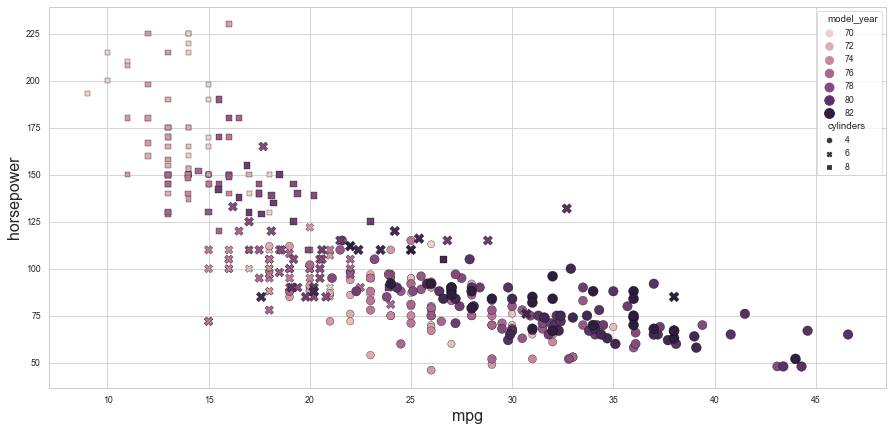

In [21]:
plt.figure(figsize=(15,7))

#sns.stripplot
sns.scatterplot(x=mpg, y=hp, 
                hue=cars.model_year,
                # hue_norm=(0, 7),  # range of hue color
                
                size=cars.model_year,  # size of dots changing with variable
                sizes=(50, 100),  # range of size
                # size_order=,
                s=100,  # size of points if size is not changing with varaible
                
                style=cyl,  # dot style should change with variable
                # markers={} # style markers linked to variable values
                
                alpha=1,
                linewidth=0.3,  # edge width
                edgecolor='black',  # edge color
                
                legend='brief',# 'full',
                
                # zorder=2  # works like z-index from css if plotting two or more graphs 
                )
plt.yticklabels=[]

## Lineplot

In [22]:
flights = sns.load_dataset('flights')

In [23]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


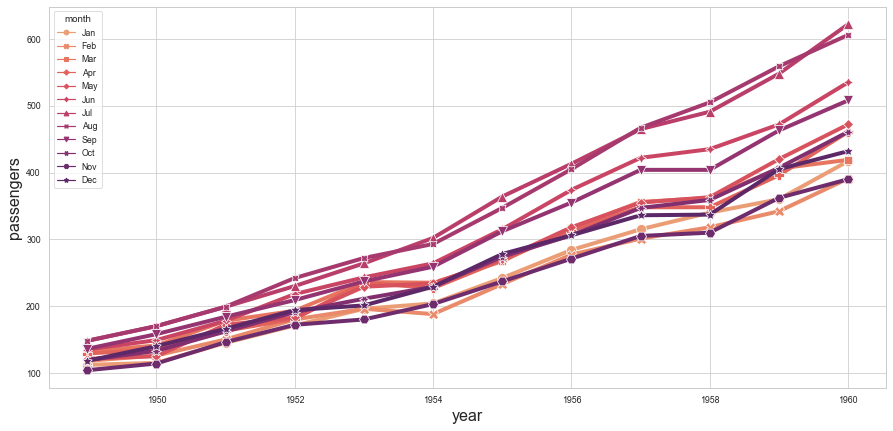

In [24]:
plt.figure(figsize=(15,7))

sns.lineplot(data = flights,
             x='year',
             y='passengers',
                          
             lw=4,  # line width
             # err_style='bars',  # draw confidence interval using bars, or translucent gradient
             # alpha=,
             # color=,
             
             palette='flare' ,
             hue='month',
             
             style='month',
             markers=True,  # different styles marked with markers
             markersize = 10,
             dashes=False,  # different styles marked with line style

             # size='month',
             # sizes=(,),  # size range
             legend="full",

             # estimator= 'sum', # 'std',
             
             # units='subject',
             # estimator=None,
             
             # seaborn uses bootstrapping to calculate confidence interval
             # n_boot= 10_00,  # determine number of bootstrapps
             # ci = 95,  # percentage of bootstrapps to fall in interval
             # ci = None,  # turns off confidence interval
            )
plt.yticklabels=[]

## Regplot

In [25]:
diamonds = sns.load_dataset('diamonds').sample(300, random_state=0)

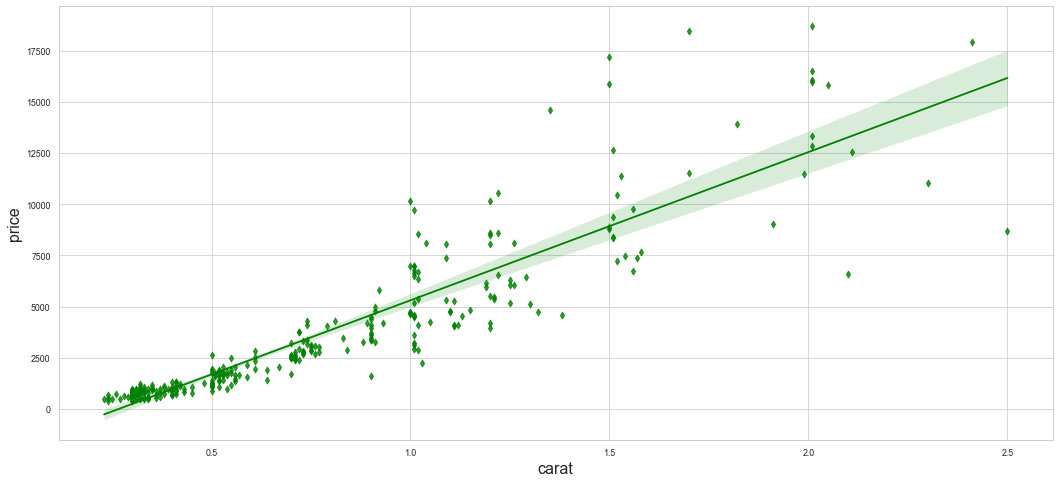

In [26]:
plt.figure(figsize=(15,7))
sns.regplot(data=diamonds,
            x='carat', y='price',
            
            # x_estimator=np.mean,  # funkcja która zostanie użyta na każdej unikatowej wartości x
            # x_jitter=0.1,  # dla discrete variables, noise żeby nie były prosto w jednej linii
            # y_jitter=.03,
              
            # x_bins=10,  # dane są grupowane do 3 bins, regression jest rysowana na oryginalnym położeniu
            truncate=True,  # linia regression jest ograniczana do danych, a nie do axes
            color='green',
            
            # robust=True,  # robust regression odporna na outliers
            # order=2,  # polynomial regression of this order
            # lowess=True,  # lowess (local) regression
            # logistic=True,  # logistic regression
            # logx=True,  # estimate regression for ~ log(x)
            
            
            # fit_reg=False,
            # line_kws={'lw': 4, 'color': 'black', 'linestyle': '-.'},
            # ci=None,  # regression ci
            # n_boot=500,  # liczba boostrapped samples to ci
            
            # scatter=False,
            marker='d', #'+',
            # scatter_kws={'s': 100, 'alpha': 0.5, 'color': 'lightgray'},
           )

# plt.xlim(0, 5)
# plt.ylim(0, 12)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.tight_layout()

In [27]:
diamonds.clarity.unique()

['SI2', 'SI1', 'VS2', 'IF', 'VVS2', 'VS1', 'I1', 'VVS1']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

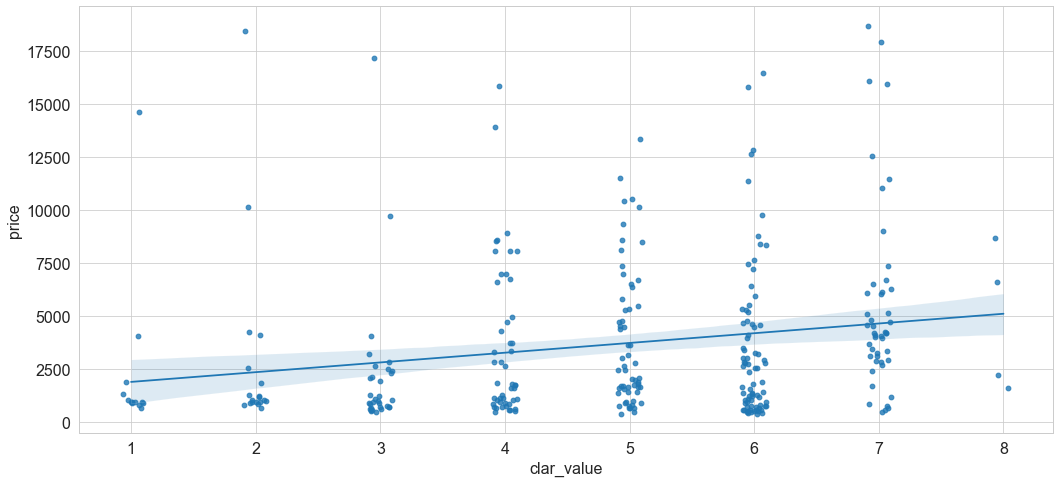

In [28]:
cut_map = {
    'Fair': 5,
    'Good': 4,
    'Very Good': 3,
    'Premium': 2,
    'Ideal': 1,
}

clarity_map = {
    'I1': 8,
    'SI2': 7,
    'SI1': 6,
    'VS2': 5,
    'VS1': 4,
    'VVS2': 3,
    'VVS1': 2,
    'IF': 1,
}

diamonds['cut_value'] = diamonds.cut.map(cut_map)
diamonds['cut_value'] = diamonds['cut_value'].cat.as_ordered().astype('int')
diamonds['clar_value'] = diamonds.clarity.map(clarity_map)
diamonds['clar_value'] = diamonds['clar_value'].cat.as_ordered().astype('int')

plt.figure(figsize=(15,7))
sns.regplot(data=diamonds,
            # x='cut_value',
            x='clar_value', 
            y='price', 

            x_jitter=0.1,
            y_jitter=0.1,
            # robust=True,
            # x_estimator=np.mean,
           )
plt.yticklabels=[]
plt.tight_layout()
# there is crealry something wrong with this distribution, ideal diamonds are cheaper than fair

In [29]:
penguins = sns.load_dataset('penguins')
penguins['is_male'] = penguins.sex == 'Male'
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   is_male            344 non-null    bool   
dtypes: bool(1), float64(4), object(3)
memory usage: 19.3+ KB


<AxesSubplot:xlabel='body_mass_g', ylabel='is_male'>

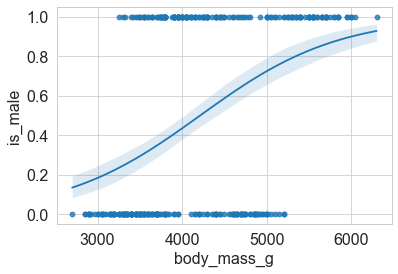

In [30]:
sns.regplot(data=penguins,
            x='body_mass_g',
            y='is_male',
            logistic=True,
           )

## Heatmap

In [31]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           391 non-null    float64
 1   cylinders     391 non-null    int64  
 2   displacement  391 non-null    float64
 3   horsepower    385 non-null    float64
 4   weight        391 non-null    int64  
 5   acceleration  391 non-null    float64
 6   model_year    391 non-null    int64  
 7   origin        391 non-null    object 
 8   name          391 non-null    object 
 9   newer         391 non-null    bool   
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 30.9+ KB


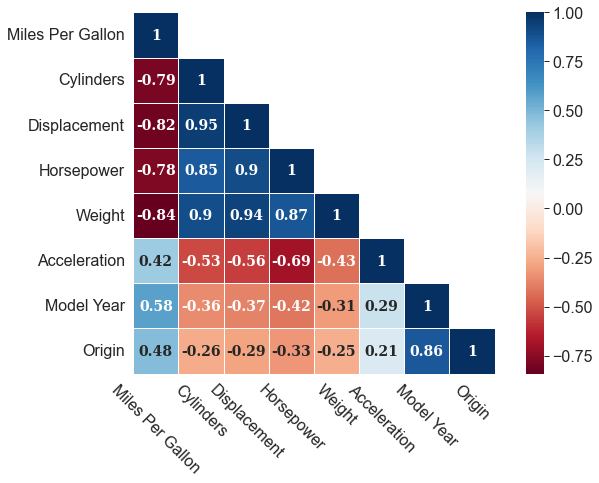

In [37]:
labels = ['Miles Per Gallon', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year',
          'Origin']

corr = cars.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False


plt.figure(figsize=(10, 7))
sns.heatmap(data=corr, # orders.T
            cmap='RdBu', #'YlOrBr',# 'Blues',
            
            # center=0,  # can be also centered on a specific cell value if we extract it
            # vmin=-1,
            # vmax=1,
            
            xticklabels=labels, # False
            yticklabels=labels, # False
            
            annot=True,
            annot_kws={'fontsize':14, 'fontweight': 'bold', 'fontfamily': 'serif'},
            # fmt='.00f',  # round annotations
            
            square=True,  # always be squares
            linewidth=1,
            linecolor='white', # 'lightgray',  # mask doesn't hide it
            
            # cbar_kws={"orientation": "horizontal"},
            
            mask=mask
           )

# to show params on top, doesn't work with mask
# plt.tick_params(
#     which='both',      
#     bottom=False,      
#     left=False,      
#     labelbottom=False,
#     labeltop=True) 

plt.xticks(rotation=-45)
plt.yticklabels=[]
plt.tight_layout()

## Pairplots

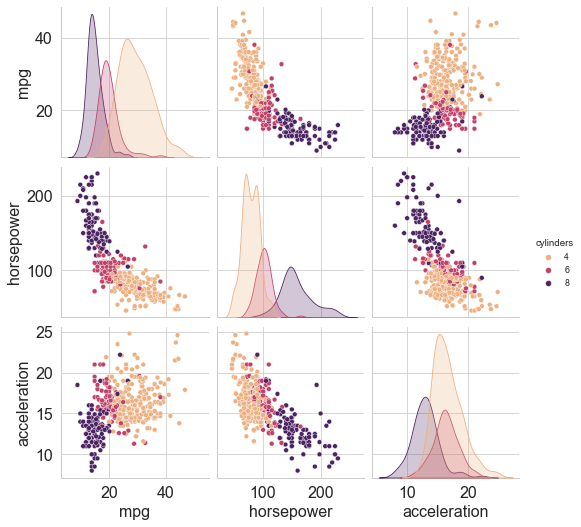

In [33]:
sns.pairplot(cars, 
             hue='cylinders', 
             vars=['mpg', 'horsepower', 'acceleration'], 
             palette='flare'
            );